# Perceptron Algorithm

Our main goal is implement the perceptron algorithm to separate the following data

<img src = 'points.png' width = 350 align="left" />

We need to remember how it works:

_For a point with coordinates $(p,q)$, label $y$, and prediction $\hat{y} = step(w_1x_1) + w_2x_2 + b)$_:
* If the point is correctly classified, do nothing.
* If the point is classified positive, but it has a negative label, subtract $\alpha p, \alpha q$ and $\alpha$ from $w_1, w_2$, and $b$, respectively.
* If the point is classified negative, but it has a positive label, add $\alpha p, \alpha q$ and $\alpha$ from $w_1, w_2$, and $b$, respectively.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
# Creating the activation function
def step_function(x):
    if x >= 0:
        return 1
    return 0

In [3]:
# Creating prediction function
def prediction(X, W, b):
    return step_function((np.matmul(X,W)+b)[0])

In [4]:
# Creating the perceptron function
# The function should receive as inputs the data X, the labels y, the weights W (an array)
# and the bias b. Must return W and b
def perceptron_step(X, y, W, b, learn_rate = .01):
    for i in range(len(X)):
        y_hat = prediction(X[i], W, b)
        if y[i] - y_hat == 1:
            W[0] += X[i][0] * learn_rate
            W[1] += X[i][1] * learn_rate
            b    += learn_rate
        elif y[i] - y_hat == -1:
            W[0] -= X[i][0] * learn_rate
            W[1] -= X[i][1] * learn_rate
            b    -= learn_rate
    return W, b

In [5]:
# This function iterates perceptron algorithm on the dataset and return the boundary lines obtained
def train_perceptron(X, y, learn_rate = .01, epochs = 100):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.randn(2,1))
    b = np.random.randn(1)[0] + x_max
    boundary_lines = []
    for i in range(epochs):
        W, b = perceptron_step(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [6]:
df = pd.read_csv('data.csv', names=['X1', 'X2', 'y'])

In [7]:
X = df[['X1','X2']].values
y = df['y'].values

In [8]:
results = train_perceptron(X, y)
result_df = pd.DataFrame(results, columns=['X_hat','Y_hat'])    

In [9]:
result_df.head()

,X_hat,Y_hat
0,[0.31505473308867943],[2.3529311790891785]
1,[-0.2074812862486698],[0.836315097959505]
2,[-0.25726798349725327],[0.684971793225702]
3,[-0.274258401342144],[0.6579843936558573]
4,[-0.28736450056593676],[0.6470724762092425]


In [10]:
for i in range(result_df.shape[0]):
    result_df['X_hat'][i] = result_df['X_hat'][i][0]
    result_df['Y_hat'][i] = result_df['Y_hat'][i][0]
x_hat = result_df['X_hat'].values
y_hat = result_df['Y_hat'].values

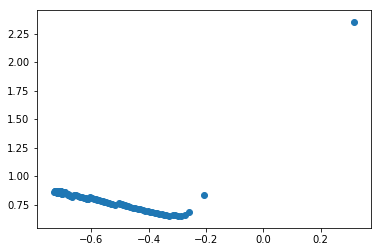

In [11]:
plt.scatter(x_hat,y_hat)